In [1]:
from skimage.io import imread, imsave, imshow

In [2]:
img = imread('00.png')

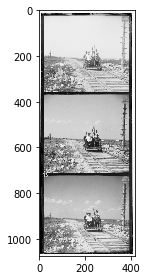

In [3]:
imshow(img);

In [4]:
img.shape

(1075, 419)

In [5]:
from skimage import img_as_float, img_as_ubyte

In [6]:
img_f = img_as_float(img)

In [7]:
vertical_border = int(img_f.shape[1] * 0.12 // 2) # вертикальная рамка

In [8]:
vertical_border

25

In [9]:
# img_f_cropped = img_f[:, vertical_border:-(vertical_border)]

In [10]:
# imshow(img_f_cropped);

In [11]:
# cropped_00 = img_as_ubyte(img_f_cropped)

In [12]:
# imsave('00-cropped.png', cropped_00)

In [13]:
# img_f_cropped.shape

In [14]:
one_third_rows = img_f.shape[0] // 3 # высота одного изображения

In [15]:
one_third_rows

358

In [16]:
horizontal_border = int((img_f.shape[0] // 3) * 0.07) # горизонтальная рамка

In [17]:
horizontal_border

25

In [18]:
(b, g, r) = [img_f[one_third_rows * i + horizontal_border : one_third_rows * (i + 1) - horizontal_border, 
                           vertical_border : -(vertical_border)] 
             for i in range(3)]

In [19]:
b.shape

(308, 369)

In [20]:
g.shape

(308, 369)

In [21]:
r.shape

(308, 369)

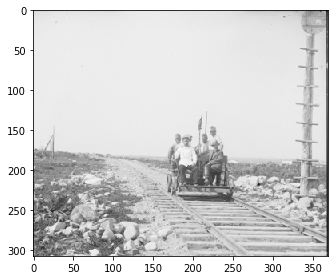

In [22]:
imshow(b);

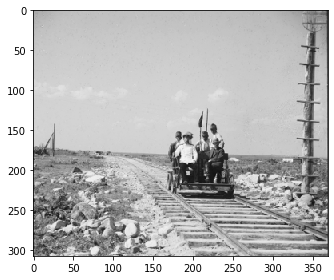

In [23]:
imshow(g);

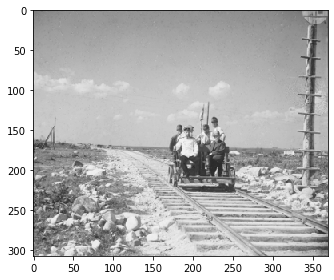

In [24]:
imshow(r);

In [25]:
import numpy as np

In [26]:
# max_correlation = 0

In [27]:
# max_b = np.array([])

In [28]:
# max_r = np.array([])

In [29]:
# max_i = -15

In [30]:
# max_j = -15

In [31]:
max_correlation_params = {
    0 : {
        'image': 'blue channel',
        'max_arr' : np.array([]),
        'max_correlation' : 0,
        'max_row' : -15,
        'max_column' : -15
    },
    1 : {
        'image': 'red channel',
        'max_arr' : np.array([]),
        'max_correlation' : 0,
        'max_row' : -15,
        'max_column' : -15
    }
}

In [32]:
#count = 0

In [33]:
for img_channel in enumerate( (b, r) ):
    #print(img_channel)
    #print(img_channel[0])
    #print(img_channel[1])
    for row_shift in range(-15, 16):
        arr_rolled_row = np.roll(img_channel[1], row_shift, axis = 0) # циклический сдвиг - 0 строки, 1 столбцы
        for column_shift in range(-15, 16):
            arr_rolled = np.roll(arr_rolled_row, column_shift, axis = 1) # циклический сдвиг - 0 строки, 1 столбцы
            correlation = (arr_rolled * g).sum()
            #print(correlation)
            #count += 1
            if correlation > max_correlation_params[img_channel[0]]['max_correlation']:
                max_correlation_params[img_channel[0]]['max_row'] = row_shift
                max_correlation_params[img_channel[0]]['max_column'] = column_shift
                max_correlation_params[img_channel[0]]['max_correlation'] = correlation
                max_correlation_params[img_channel[0]]['max_arr'] = arr_rolled

In [34]:
#count # 1922 / 2 = 961; 31 ^ 2 = 961 [-15; 15]

In [35]:
max_correlation_params

{0: {'image': 'blue channel',
  'max_arr': array([[0.23137255, 0.87058824, 0.8745098 , ..., 0.70980392, 0.50196078,
          0.21176471],
         [0.25490196, 0.8745098 , 0.88235294, ..., 0.71372549, 0.4627451 ,
          0.21568627],
         [0.25098039, 0.88235294, 0.88235294, ..., 0.68627451, 0.46666667,
          0.23921569],
         ...,
         [0.1372549 , 0.7372549 , 0.7372549 , ..., 0.40784314, 0.20784314,
          0.15294118],
         [0.16470588, 0.85098039, 0.84705882, ..., 0.62352941, 0.34509804,
          0.16470588],
         [0.19215686, 0.85882353, 0.85882353, ..., 0.6745098 , 0.4627451 ,
          0.19215686]]),
  'max_correlation': 66140.94660515187,
  'max_row': -3,
  'max_column': 1},
 1: {'image': 'red channel',
  'max_arr': array([[0.50980392, 0.54509804, 0.50196078, ..., 0.2627451 , 0.24705882,
          0.49019608],
         [0.54117647, 0.53333333, 0.58823529, ..., 0.31764706, 0.27843137,
          0.48627451],
         [0.59607843, 0.55686275, 0.537254

In [36]:
row_g, col_g = (508, 237) # координаты точки на зеленом канале

In [37]:
(row_b, col_b) = (row_g - (img.shape[0] // 3) - max_correlation_params[0]['max_row'], col_g - max_correlation_params[0]['max_column'])

In [38]:
(row_b, col_b)

(153, 236)

In [39]:
(row_r, col_r) = (row_g + (img.shape[0] // 3) - max_correlation_params[1]['max_row'], col_g - max_correlation_params[1]['max_column'])

In [40]:
(row_r, col_r)

(857, 238)

In [41]:
from numpy import dstack

In [42]:
img_combined = dstack((max_correlation_params[1]['max_arr'], g, max_correlation_params[0]['max_arr']))

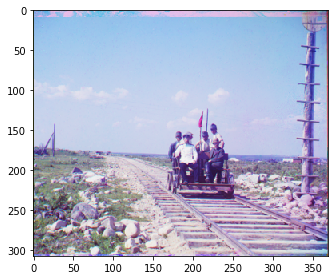

In [43]:
imshow(img_combined);

In [44]:
img_combined_without_shift = dstack((r, g, b))

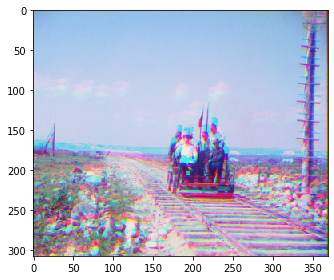

In [45]:
imshow(img_combined_without_shift);

In [46]:
without_shift = img_as_ubyte(img_combined_without_shift)

In [47]:
imsave('00-without-shift.png', without_shift)

In [48]:
shift = img_as_ubyte(img_combined)

In [49]:
imsave('00-color.png', shift)